In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

C:\Users\RITU\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
start = '2010-01-01'
end = '2019-12-01'
# Use yfinance to fetch stock data
df = yf.download('TSLA', start=start, end=end)
df.head()

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-22,22.677334,22.733334,22.000000,22.202667,22.202667,253059000
2019-11-25,22.954666,22.971333,22.297333,22.422667,22.422667,185092500
2019-11-26,22.351334,22.366667,21.806667,21.927999,21.927999,119211000
2019-11-27,22.074667,22.261999,21.904667,22.086000,22.086000,83334000
2019-11-29,22.073999,22.084000,21.833332,21.996000,21.996000,36984000


In [4]:
df = df.reset_index()

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
df = df.drop(['Date', 'Adj Close'], axis =1)

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


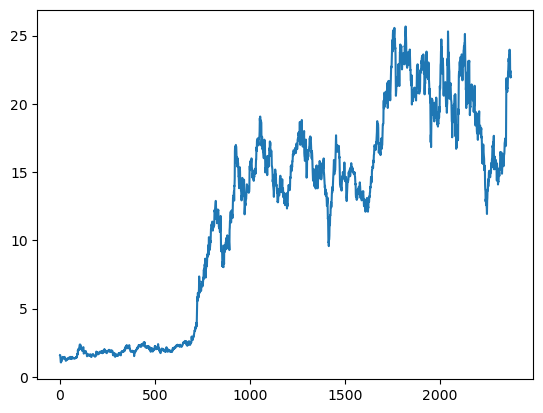

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2368,22.677334,22.733334,22.000000,22.202667,253059000
2369,22.954666,22.971333,22.297333,22.422667,185092500
2370,22.351334,22.366667,21.806667,21.927999,119211000
2371,22.074667,22.261999,21.904667,22.086000,83334000


In [10]:
m100= df.Close.rolling(100).mean()

In [11]:
m100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2368    17.272633
2369    17.341460
2370    17.407180
2371    17.474667
2372    17.535347
Name: Close, Length: 2373, dtype: float64

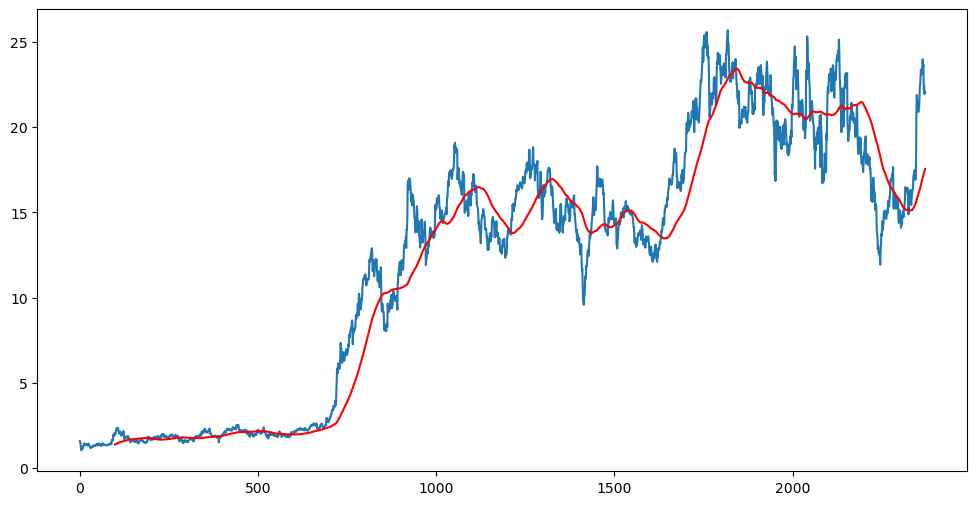

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(m100, 'r')

In [13]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2368    17.035390
2369    17.043223
2370    17.048927
2371    17.056633
2372    17.065357
Name: Close, Length: 2373, dtype: float64

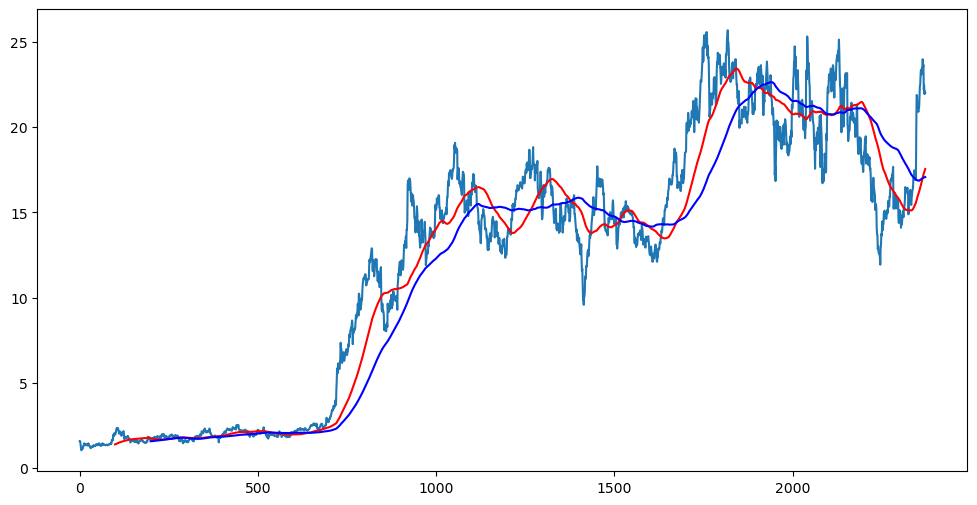

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(m100, 'r')
plt.plot(ma200, 'b')

In [15]:
df.shape

(2373, 5)

In [16]:
#Splitting data into training and testing
data_training_lstm = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing_lstm = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))]) 
print(data_training_lstm.shape)
print(data_testing_lstm.shape)

(1661, 1)
(712, 1)


In [17]:
data_training_lstm.head

<bound method NDFrame.head of           Close
0      1.592667
1      1.588667
2      1.464000
3      1.280000
4      1.074000
...         ...
1656  16.834000
1657  16.863333
1658  16.708668
1659  16.795334
1660  16.615999

[1661 rows x 1 columns]>

In [18]:
data_testing_lstm.head

<bound method NDFrame.head of           Close
1661  16.770000
1662  16.755333
1663  17.184668
1664  17.165333
1665  17.472000
...         ...
2368  22.202667
2369  22.422667
2370  21.927999
2371  22.086000
2372  21.996000

[712 rows x 1 columns]>

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [20]:
data_training_array_lstm = scaler.fit_transform(data_training_lstm)
data_training_array_lstm

array([[0.02993639],
       [0.02971437],
       [0.02279457],
       ...,
       [0.86896845],
       [0.87377895],
       [0.86382477]])

In [21]:
data_training_array_lstm.shape

(1661, 1)

In [22]:
x_train_lstm= []
y_train_lstm= []

for i in range(100,data_training_array_lstm.shape[0]):
    x_train_lstm.append(data_training_array_lstm[i-100:i])
    y_train_lstm.append(data_training_array_lstm[i,0])
    
x_train_lstm, y_train_lstm= np.array(x_train_lstm),np.array(y_train_lstm)

In [23]:
#Machine Learning model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train_lstm.shape[1], 1)))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))
model_LSTM.add(Dropout(0.3))

model_LSTM.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model_LSTM.add(Dropout(0.4))

model_LSTM.add(LSTM(units = 120, activation = 'relu'))
model_LSTM.add(Dropout(0.5))

model_LSTM.add(Dense (units = 1))

In [26]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model_LSTM.compile(optimizer= 'adam', loss= 'mean_squared_error')
model_LSTM.fit(x_train_lstm, y_train_lstm, epochs = 50)


Epoch 1/50

49/49 [==============================] - 17s 197ms/step - loss: 0.0713
Epoch 2/50
49/49 [==============================] - 10s 199ms/step - loss: 0.0159
Epoch 3/50
49/49 [==============================] - 9s 192ms/step - loss: 0.0127
Epoch 4/50
49/49 [==============================] - 10s 194ms/step - loss: 0.0117
Epoch 5/50
49/49 [==============================] - 10s 204ms/step - loss: 0.0103
Epoch 6/50
49/49 [==============================] - 10s 208ms/step - loss: 0.0107
Epoch 7/50
49/49 [==============================] - 11s 219ms/step - loss: 0.0107
Epoch 8/50
49/49 [==============================] - 11s 218ms/step - loss: 0.0091
Epoch 9/50
49/49 [==============================] - 10s 201ms/step - loss: 0.0097
Epoch 10/50
49/49 [==============================] - 10s 205ms/step - loss: 0.0086
Epoch 11/50
49/49 [==============================] - 10s 210ms/step - loss: 0.0093
Epoch 12/50
49/49 [==============================] - 10s 212ms/step - loss: 0.0089
Epoch 13/50


In [28]:
model_LSTM.save('lstm_model.h5')

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
data_testing_lstm.head()

,Close
1661,16.770000
1662,16.755333
1663,17.184668
1664,17.165333
1665,17.472000


In [30]:
data_training_lstm.tail(100)

,Close
1561,12.964667
1562,13.220000
1563,13.070000
1564,13.094000
1565,13.361333
...,...
1656,16.834000
1657,16.863333
1658,16.708668
1659,16.795334


In [31]:
past_100_days= data_training_lstm.tail(100)

In [32]:
print(type(past_100_days))
print(type(data_testing_lstm))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [33]:
final_df_lstm = past_100_days._append(data_testing_lstm, ignore_index = True)

In [34]:
final_df_lstm.head()

,Close
0,12.964667
1,13.220000
2,13.070000
3,13.094000
4,13.361333


In [35]:
input_data_lstm= scaler.fit_transform(final_df_lstm)
input_data_lstm

array([[0.07523185],
       [0.09382135],
       [0.08290057],
       [0.0846479 ],
       [0.10411106],
       [0.12828228],
       [0.13284473],
       [0.12459355],
       [0.12740861],
       [0.1332816 ],
       [0.13823232],
       [0.14570698],
       [0.13027234],
       [0.132505  ],
       [0.10547012],
       [0.12163283],
       [0.16856773],
       [0.15745282],
       [0.14313451],
       [0.10692619],
       [0.08561863],
       [0.10668352],
       [0.10255793],
       [0.10940158],
       [0.10323739],
       [0.0851333 ],
       [0.07275646],
       [0.0977042 ],
       [0.11935163],
       [0.0977042 ],
       [0.10250933],
       [0.11546864],
       [0.11343011],
       [0.11294478],
       [0.12153576],
       [0.10192693],
       [0.09105475],
       [0.05737029],
       [0.04392572],
       [0.04101352],
       [0.05625402],
       [0.0691162 ],
       [0.07751305],
       [0.05382716],
       [0.03096641],
       [0.04654671],
       [0.01203718],
       [0.023

In [36]:
input_data_lstm.shape

(812, 1)

In [37]:
input_data_lstm.shape[0]

812

In [38]:
x_test_lstm= []
y_test_lstm= []

for i in range(100, input_data_lstm.shape[0]):
        x_test_lstm.append(input_data_lstm[i-100:i])
        y_test_lstm.append(input_data_lstm[i,0])

In [39]:
x_test_lstm, y_test_lstm = np.array(x_test_lstm), np.array(y_test_lstm)
print(x_test_lstm.shape)
print(y_test_lstm.shape)

(712, 100, 1)
(712,)


In [40]:
#making predictions
y_predicted_lstm= model_LSTM.predict(x_test_lstm)

23/23 [==============================] - 4s 99ms/step


In [41]:
y_predicted_lstm.shape

(712, 1)

In [42]:
y_test_lstm

array([0.35227883, 0.35121096, 0.38246864, 0.38106097, 0.40338786,
       0.43794592, 0.43809159, 0.49327768, 0.49512208, 0.48920062,
       0.43673253, 0.45265249, 0.47769738, 0.45886515, 0.37382905,
       0.37873124, 0.32645728, 0.34470711, 0.34485264, 0.34708544,
       0.3523759 , 0.35062857, 0.33791192, 0.32956367, 0.32000203,
       0.31412904, 0.32616608, 0.38358497, 0.37256719, 0.40324219,
       0.40057266, 0.40261119, 0.3480561 , 0.36907253, 0.36795606,
       0.40862985, 0.44289672, 0.47798871, 0.47764891, 0.48026984,
       0.48211423, 0.58025524, 0.60539732, 0.56317048, 0.58112897,
       0.59976693, 0.64757557, 0.62971414, 0.57210112, 0.60685332,
       0.59442801, 0.58865209, 0.6142309 , 0.5996214 , 0.61461917,
       0.62641361, 0.65437062, 0.63680039, 0.62932574, 0.65572969,
       0.69824773, 0.6791243 , 0.64092605, 0.565403  , 0.62796681,
       0.62233656, 0.69062755, 0.70984805, 0.69955833, 0.70785798,
       0.6645148 , 0.66999953, 0.61709456, 0.6508275 , 0.64000

In [43]:
y_predicted_lstm

array([[0.33141303],
       [0.33744258],
       [0.34261808],
       [0.34713703],
       [0.35119218],
       [0.3550319 ],
       [0.35904133],
       [0.36349243],
       [0.36911643],
       [0.37648046],
       [0.3855871 ],
       [0.3953458 ],
       [0.40477896],
       [0.41349202],
       [0.42109114],
       [0.42677146],
       [0.43017888],
       [0.43118906],
       [0.43000782],
       [0.427018  ],
       [0.42265475],
       [0.41737032],
       [0.4115718 ],
       [0.40556598],
       [0.39956397],
       [0.39369208],
       [0.38802236],
       [0.38264388],
       [0.37786764],
       [0.37392682],
       [0.37109905],
       [0.3695054 ],
       [0.36912346],
       [0.36956555],
       [0.3704877 ],
       [0.3716156 ],
       [0.3729583 ],
       [0.37478107],
       [0.37759197],
       [0.3818888 ],
       [0.3878538 ],
       [0.39531285],
       [0.40515953],
       [0.4188186 ],
       [0.43608534],
       [0.45603812],
       [0.47768313],
       [0.500

In [44]:
scaler.scale_

array([0.07280492])

In [45]:
scale_factor= 1/0.07280492
y_predicted_lstm = y_predicted_lstm*scale_factor
y_test_lstm = y_test_lstm*scale_factor

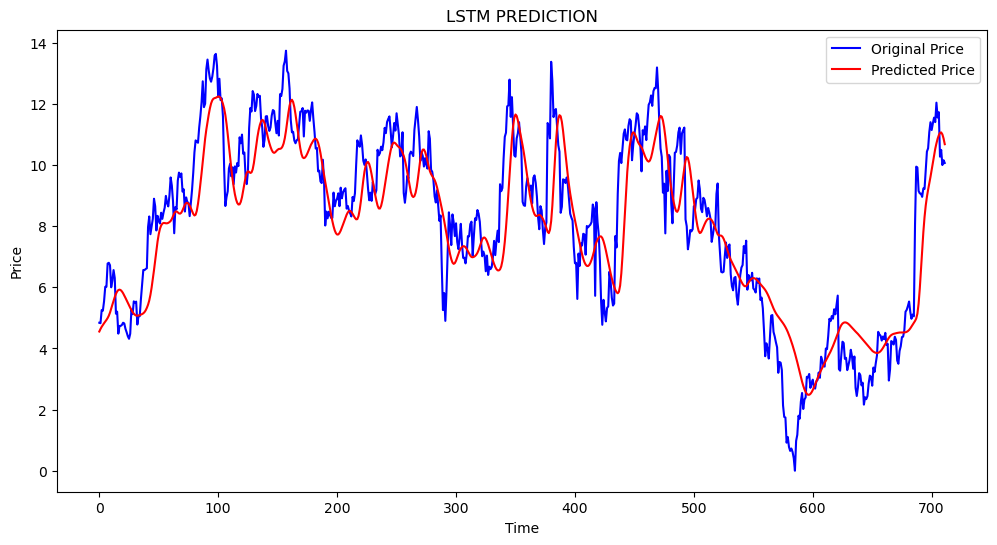

In [46]:
plt.figure(figsize=(12,6))
plt.title('LSTM PREDICTION')
plt.plot(y_test_lstm, 'b', label= 'Original Price')
plt.plot(y_predicted_lstm, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [47]:
def calculate_accuracy(y_predicted_lstm, y_test_lstm):
   
    # Calculate the absolute error between predictions and actual values
    errors = np.abs(y_predicted_lstm - y_test_lstm)
    
    # Calculate the mean absolute error (MAE)
    mean_absolute_error = np.mean(errors)
    
    # Calculate the accuracy
    accuracy = 1 - (mean_absolute_error / np.mean(y_test_lstm))
    
    return accuracy

# Example usage:
y_predicted = np.array(y_predicted_lstm)
y_test = np.array(y_test_lstm)

accuracy_LSTM = calculate_accuracy(y_predicted_lstm, y_test_lstm)
print("Accuracy:", accuracy_LSTM)


Accuracy: 0.6187863002404157


In [48]:
 # Calculate the absolute error between predictions and actual values
errors_lstm = np.abs(y_predicted_lstm - y_test_lstm)
    
    # Calculate the mean absolute error (MAE)
mean_absolute_error_lstm = np.mean(errors_lstm)
print("Mean Absolute Error:",mean_absolute_error_lstm)

Mean Absolute Error: 3.1080309598962854


In [49]:


def mean_squared_error(y_predicted_lstm, y_test_lstm):
   
    # Calculate the squared error
    squared_error = np.square(y_test_lstm - y_predicted_lstm)
    
    # Calculate the mean squared error
    mse_lstm = np.mean(squared_error)
    
    return mse_lstm
mse_lstm = mean_squared_error(y_test_lstm, y_predicted_lstm)
print("Mean Squared Error:", mse_lstm)


Mean Squared Error: 14.734190689404466


In [50]:

rmse_lstm = np.sqrt(mse_lstm)
 
print("Root Mean Squared Error:", rmse_lstm)


Root Mean Squared Error: 3.838514125205802


In [51]:
print("Metrics of LSTM MODEL")
print("Root Mean Squared Error:", rmse_lstm)
print("Mean Squared Error:", mse_lstm)
print("Mean Absolute Error:",mean_absolute_error_lstm)
print("Accuracy:", accuracy_LSTM)

Metrics of LSTM MODEL
Root Mean Squared Error: 3.838514125205802
Mean Squared Error: 14.734190689404466
Mean Absolute Error: 3.1080309598962854
Accuracy: 0.6187863002404157


In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
#Splitting data into training and testing
data_training_gb = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing_gb = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))]) 
print(data_training_gb.shape)
print(data_testing_gb.shape)

(1661, 1)
(712, 1)


In [54]:
data_training_gb.head

<bound method NDFrame.head of           Close
0      1.592667
1      1.588667
2      1.464000
3      1.280000
4      1.074000
...         ...
1656  16.834000
1657  16.863333
1658  16.708668
1659  16.795334
1660  16.615999

[1661 rows x 1 columns]>

In [55]:
data_testing_gb.head

<bound method NDFrame.head of           Close
1661  16.770000
1662  16.755333
1663  17.184668
1664  17.165333
1665  17.472000
...         ...
2368  22.202667
2369  22.422667
2370  21.927999
2371  22.086000
2372  21.996000

[712 rows x 1 columns]>

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [57]:
data_training_array_gb = scaler.fit_transform(data_training_gb)
data_training_array_gb

data_training_array_gb.shape

(1661, 1)

In [58]:
x_train_gb= []
y_train_gb= []

for i in range(100,data_training_array_gb.shape[0]):
    x_train_gb.append(data_training_array_gb[i-100:i])
    y_train_gb.append(data_training_array_gb[i,0])
    
x_train_gb, y_train_gb= np.array(x_train_gb),np.array(y_train_gb)

In [59]:
train_row,train_col,train_num=x_train_gb.shape
x_train_gb.shape

(1561, 100, 1)

In [60]:
past_100_days= data_training_gb.tail(100)

print(type(past_100_days))
print(type(data_testing_gb))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [61]:
final_df_gb = past_100_days._append(data_testing_gb, ignore_index = True)

final_df_gb.head()

,Close
0,12.964667
1,13.220000
2,13.070000
3,13.094000
4,13.361333


In [62]:
input_data_gb= scaler.fit_transform(final_df_gb)
input_data_gb

array([[0.07523185],
       [0.09382135],
       [0.08290057],
       [0.0846479 ],
       [0.10411106],
       [0.12828228],
       [0.13284473],
       [0.12459355],
       [0.12740861],
       [0.1332816 ],
       [0.13823232],
       [0.14570698],
       [0.13027234],
       [0.132505  ],
       [0.10547012],
       [0.12163283],
       [0.16856773],
       [0.15745282],
       [0.14313451],
       [0.10692619],
       [0.08561863],
       [0.10668352],
       [0.10255793],
       [0.10940158],
       [0.10323739],
       [0.0851333 ],
       [0.07275646],
       [0.0977042 ],
       [0.11935163],
       [0.0977042 ],
       [0.10250933],
       [0.11546864],
       [0.11343011],
       [0.11294478],
       [0.12153576],
       [0.10192693],
       [0.09105475],
       [0.05737029],
       [0.04392572],
       [0.04101352],
       [0.05625402],
       [0.0691162 ],
       [0.07751305],
       [0.05382716],
       [0.03096641],
       [0.04654671],
       [0.01203718],
       [0.023

In [63]:
input_data_gb.shape[0]

812

In [64]:
x_test_gb= []
y_test_gb= []

for i in range(100, input_data_gb.shape[0]):
        x_test_gb.append(input_data_gb[i-100:i])
        y_test_gb.append(input_data_gb[i,0])

x_test_gb, y_test_gb = np.array(x_test_gb), np.array(y_test_gb)
print(x_test_gb.shape)
print(y_test_gb.shape)

(712, 100, 1)
(712,)


In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
# Reshape the input data to 2-dimensional arrays if necessary
x_train_gb = np.reshape(x_train_gb, (x_train_gb.shape[0], -1))


In [67]:
model_GB= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=1)

In [68]:
model_GB.fit(x_train_gb, y_train_gb)

GradientBoostingRegressor(max_depth=1, random_state=1)

In [69]:
# Reshape the input data to 2-dimensional arrays if necessary
x_test_gb = np.reshape(x_test_gb, (x_test_gb.shape[0], -1))


In [70]:
# Use the model to predict sales for the test data
predictions = model_GB.predict(x_test_gb)

In [71]:
y_predicted_gb = model_GB.predict(x_test_gb)

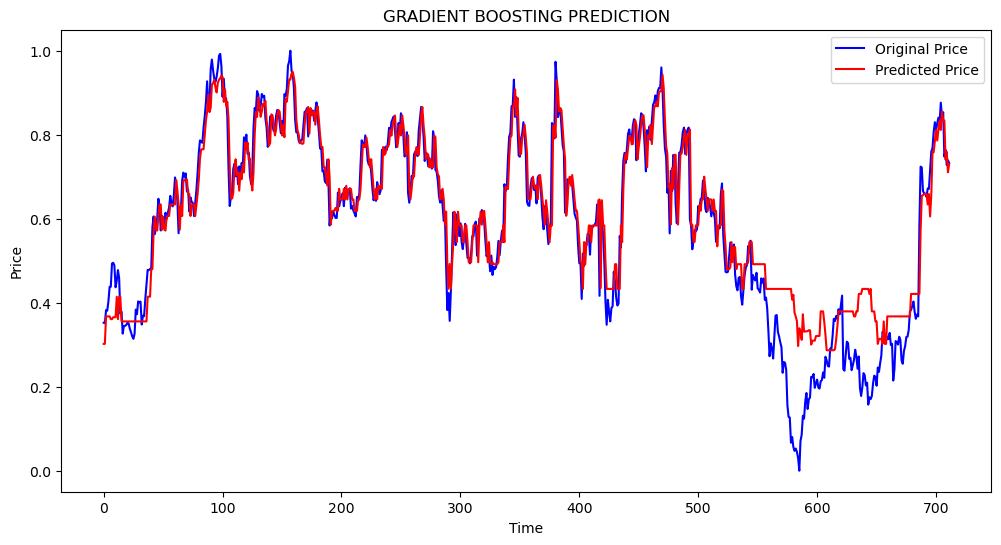

In [72]:
plt.figure(figsize=(12,6))
plt.title('GRADIENT BOOSTING PREDICTION')
plt.plot(y_test_gb, 'b', label= 'Original Price')
plt.plot(y_predicted_gb, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [73]:
def mean_squared_error(y_predicted_gb, y_test_gb):
   
    # Calculate the squared error
    squared_error_gb = np.square(y_test_gb - y_predicted_gb)
    
    # Calculate the mean squared error
    mse_gb = np.mean(squared_error_gb)
    
    return mse_gb
mse_gb = mean_squared_error(y_test_gb, y_predicted_gb)
print("Mean Squared Error:", mse_gb)


Mean Squared Error: 0.006269528076265031


In [74]:

    
    # Calculate the root mean squared error
rmse_gb = np.sqrt(mse_gb)
    
print("Root Mean Squared Error:", rmse_gb)


Root Mean Squared Error: 0.07918035157957452


In [75]:
def calculate_accuracy(y_predicted_gb, y_test_gb):
   
    # Calculate the absolute error between predictions and actual values
    errors = np.abs(y_predicted_gb - y_test_gb)
    
    # Calculate the mean absolute error (MAE)
    mean_absolute_error = np.mean(errors)
    
    # Calculate the accuracy
    accuracy = 1 - (mean_absolute_error / np.mean(y_test_gb))
    
    return accuracy

# Example usage:
y_predicted = np.array(y_predicted)
y_test = np.array(y_test)

accuracy_gb = calculate_accuracy(y_predicted_gb, y_test_gb)
print("Accuracy:", accuracy_gb)

Accuracy: 0.9117112266537387


In [76]:
errors = np.abs(y_predicted_gb - y_test_gb)
# Calculate the mean absolute error (MAE)
mean_absolute_error_gb = np.mean(errors)
print("Mean Absolute Error:",mean_absolute_error_gb)

Mean Absolute Error: 0.052406245694176644


In [77]:
print("Metrics of Gradient Boosting Model")
print("Mean Squared Error:",mse_gb)
print("Accuracy:", accuracy_gb)
print("Mean Absolute Error:",mean_absolute_error_gb)
print("Root Mean Squared Error:",rmse_gb)

Metrics of Gradient Boosting Model
Mean Squared Error: 0.006269528076265031
Accuracy: 0.9117112266537387
Mean Absolute Error: 0.052406245694176644
Root Mean Squared Error: 0.07918035157957452


In [78]:
print("Metrics of LSTM MODEL")
print("Mean Squared Error:", mse_lstm)
print("Accuracy:", accuracy_LSTM)
print("Mean Absolute Error:",mean_absolute_error_lstm)
print("Root Mean Squared Error:", rmse_lstm)

Metrics of LSTM MODEL
Mean Squared Error: 14.734190689404466
Accuracy: 0.6187863002404157
Mean Absolute Error: 3.1080309598962854
Root Mean Squared Error: 3.838514125205802


Text(0.5, 1.0, 'LSTM PREDICTION')

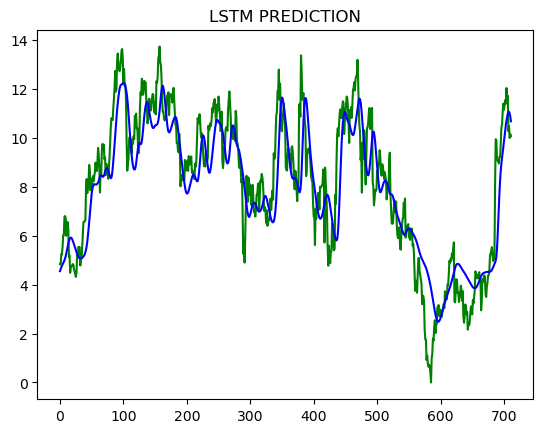

In [79]:
plt.plot(y_test_lstm, 'g', label= 'Original Price')
plt.plot(y_predicted_lstm, 'b', label = 'Predicted Price')
plt.title('LSTM PREDICTION')

Text(0.5, 1.0, 'GRADIENT BOOSTING PREDICTION')

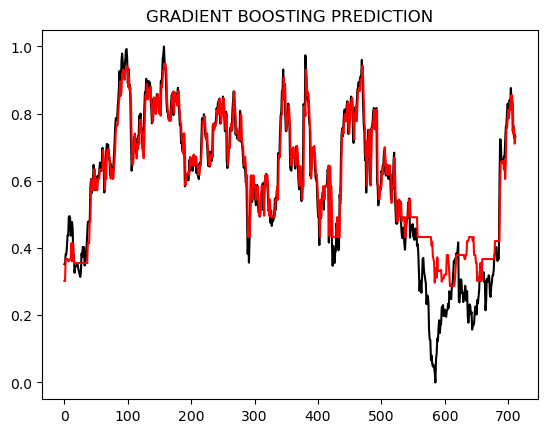

In [80]:
plt.plot(y_test_gb, 'black', label= 'Original Price')
plt.plot(y_predicted_gb, 'r', label = 'Predicted Price')
plt.title('GRADIENT BOOSTING PREDICTION')

In [81]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

In [82]:
# Fetching stock data from Yahoo Finance
def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download('TSLA', start='2010-01-01', end='2019-12-01')
    return data

In [83]:
# Preprocessing data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
    return scaled_data, scaler

In [84]:
# Creating sequences and labels
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

In [85]:
# Building the GRU model
def build_model(seq_length):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(GRU(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [86]:
  # Fetching stock data
stock_data = fetch_stock_data('TSLA', '2010-01-01', '2019-12-01')    
    # Preprocessing data
scaled_data, scaler = preprocess_data(stock_data)
seq_length = 30  # Sequence length for training    
    # Creating sequences and labels
x, y = create_sequences(scaled_data, seq_length)

C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [87]:
 # Splitting data into training and testing sets
split = int(0.8 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

In [88]:
#  Reshaping data for GRU input
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [89]:
 # Building the GRU model
model = build_model(seq_length)
    
    # Training the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
59/59 [==============================] - 11s 36ms/step - loss: 0.0062
Epoch 2/50
59/59 [==============================] - 2s 36ms/step - loss: 3.9742e-04
Epoch 3/50
59/59 [==============================] - 2s 36ms/step - loss: 3.6698e-04
Epoch 4/50
59/59 [==============================] - 2s 36ms/step - loss: 3.2469e-04
Epoch 5/50
59/59 [==============================] - 2s 35ms/step - loss: 3.0288e-04
Epoch 6/50
59/59 [==============================] - 2s 33ms/step - loss: 2.9167e-04
Epoch 7/50
59/59 [==============================] - 2s 37ms/step - loss: 2.9337e-04
Epoch 8/50
59/59 [==============================] - 2s 36ms/step - loss: 3.1886e-04
Epoch 9/50
59/59 [==============================] - 2s 35ms/step - loss: 2.8286e-04
Epoch 10/50
59/59 [==============================] - 2s 41ms/step - loss: 2.4511e-04
Epoch 11/50
59/59 [==============================] - 2s 39ms/step - loss: 2.2685e-04
Epoch 12/50
59/59 [==============================] - 2s 38ms/step - loss: 2.2

In [112]:
model.save('GRU_model.h5')

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
 # Evaluating the model
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

15/15 [==============================] - 2s 15ms/step - loss: 7.7353e-04
Test Loss: 0.0007735325489193201


In [91]:
# Making predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

15/15 [==============================] - 2s 16ms/step


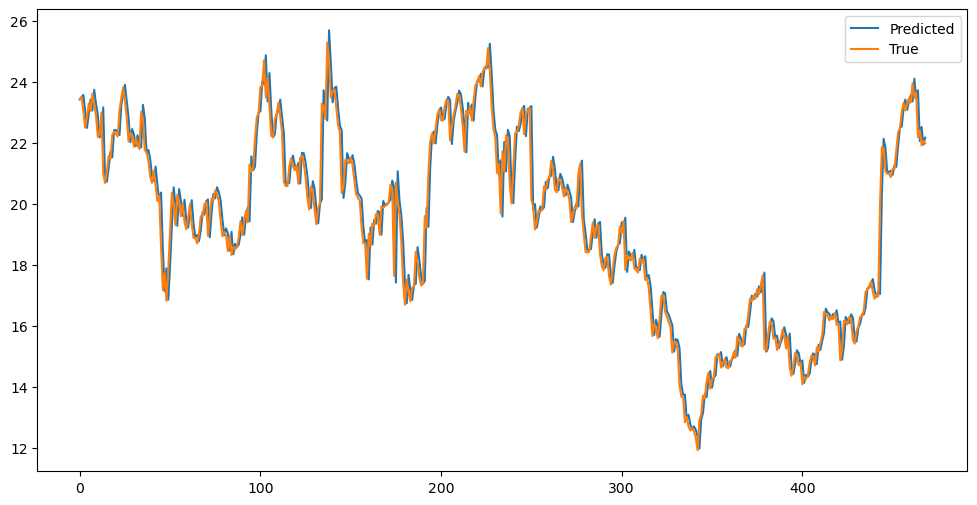

In [92]:
# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='True')
plt.legend()
plt.show()

In [93]:
def calculate_accuracy(predictions, y_test):
   
    # Calculate the absolute error between predictions and actual values
    errors = np.abs(predictions - y_test)
    
    # Calculate the mean absolute error (MAE)
    mean_absolute_error = np.mean(errors)
    
    # Calculate the accuracy
    accuracy = 1 - (mean_absolute_error / np.mean(y_test))
    
    return accuracy

accuracy_gru = calculate_accuracy(predictions, y_test)
print("Accuracy:", accuracy_gru)

Accuracy: 0.9754216771695444


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate the model
def evaluate_model(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Calculate accuracy metrics
mae, mse, rmse = evaluate_model(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.4762393304788228
Mean Squared Error (MSE): 0.4686185264410833
Root Mean Squared Error (RMSE): 0.6845571754361233


In [95]:
#SVM

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
start = '2010-01-01'
end = '2019-12-01'
# Use yfinance to fetch stock data
df = yf.download('TSLA', start=start, end=end)
df.head()


C:\ProgramData\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [8]:
#Splitting data into training and testing
data_training_svm = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing_svm = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))]) 


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [10]:
data_training_array_svm = scaler.fit_transform(data_training_svm)


In [11]:
x_test_svm= []
y_test_svm= []

for i in range(100,data_training_array_svm.shape[0]):
    x_test_svm.append(data_training_array_svm[i-100:i])
    y_test_svm.append(data_training_array_svm[i,0])
    
x_test_svm, y_test_svm= np.array(x_test_svm),np.array(y_test_svm)

In [12]:
# Create and train the Support Vector Regression model
model_svm = SVR(kernel='linear')

In [13]:
x_test_svm = np.reshape(x_test_svm, (x_test_svm.shape[0], -1))
y_test_svm = np.reshape(y_test_svm, (y_test_svm.shape[0],))

In [14]:
    model_svm.fit(x_test_svm, y_test_svm)

SVR(kernel='linear')

In [15]:

# Make predictions
predictions = model_svm.predict(x_test_svm)


In [17]:
from joblib import dump
dump(model_svm,'C:/Users/RITU/OneDrive/Desktop/Sem_8/StockMarket/model_svm.joblib')
# model_svm.save('model_svm.h5')

['C:/Users/RITU/OneDrive/Desktop/Sem_8/StockMarket/model_svm.joblib']

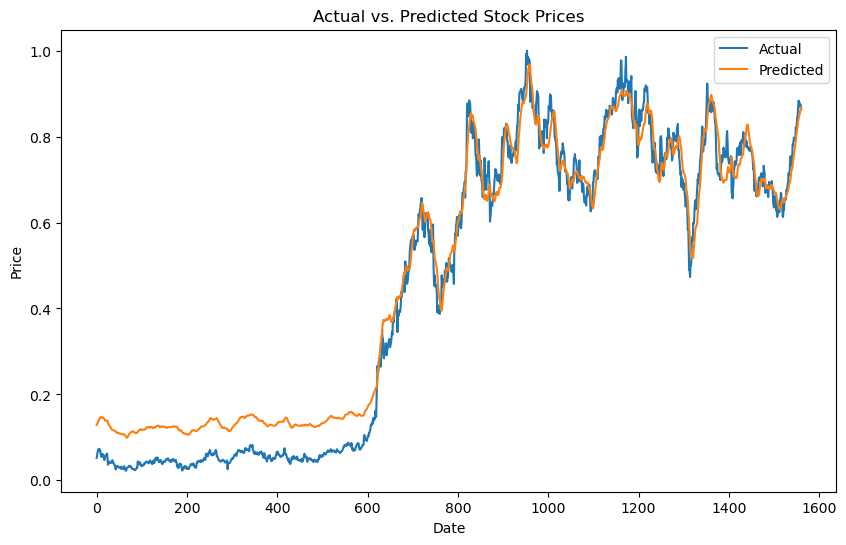

In [109]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_svm, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [110]:
def calculate_accuracy(predictions, y_test_svm):
   
    # Calculate the absolute error between predictions and actual values
    errors = np.abs(predictions - y_test_svm)
    
    # Calculate the mean absolute error (MAE)
    mean_absolute_error = np.mean(errors)
    
    # Calculate the accuracy
    accuracy = 1 - (mean_absolute_error / np.mean(y_test_svm))
    
    return accuracy

accuracy_svm = calculate_accuracy(predictions, y_test_svm)
print("Accuracy:", accuracy_svm)

errors = np.abs(predictions - y_test_svm)
# Calculate the mean absolute error (MAE)
mean_absolute_error_svm = np.mean(errors)
print("Mean Absolute Error:",mean_absolute_error_svm)

def mean_squared_error(predictions, y_test_svm):
   
    # Calculate the squared error
    squared_error_svm = np.square(y_test_svm - predictions)
    
    # Calculate the mean squared error
    mse_svm = np.mean(squared_error_svm)
    
    return mse_svm
mse_svm = mean_squared_error(y_test_svm, predictions)
print("Mean Squared Error:", mse_svm)

   
    # Calculate the root mean squared error
rmse_svm = np.sqrt(mse_svm)
    
print("Root Mean Squared Error:", rmse_svm)

Accuracy: 0.8881704056402916
Mean Absolute Error: 0.05017607704250507
Mean Squared Error: 0.0033523307601589355
Root Mean Squared Error: 0.05789931571408194


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


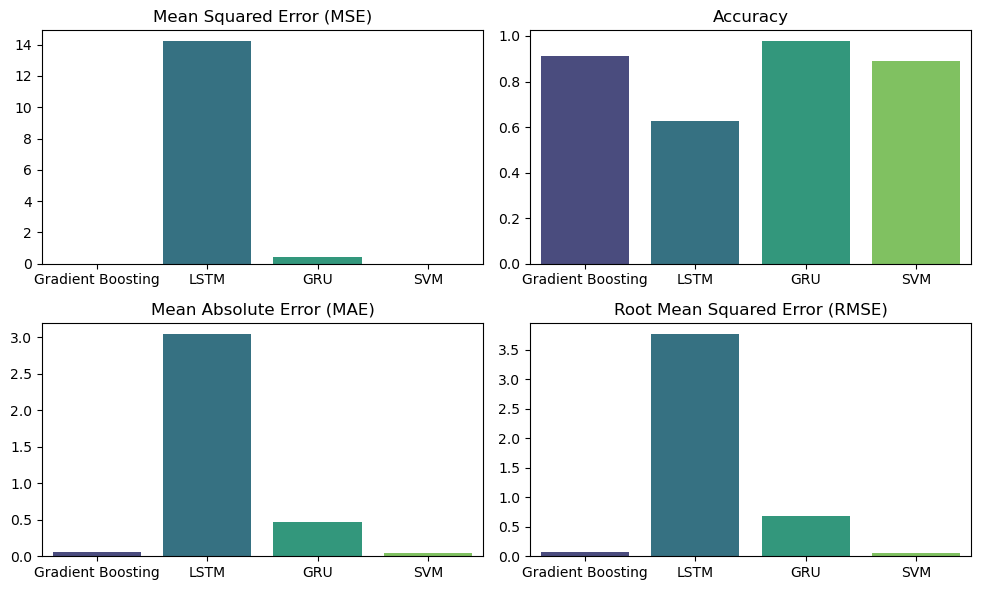

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Gradient Boosting', 'LSTM', 'GRU', 'SVM']
mse = [0.00627, 14.2066, 0.45844, 0.00335]
accuracy = [0.9117, 0.6262, 0.9758, 0.8882]
mae = [0.05241, 3.0479, 0.46897, 0.05018]
rmse = [0.07918, 3.7692, 0.6771, 0.0579]

# Plot
plt.figure(figsize=(10, 6))

# MSE
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=mse, palette='viridis')
plt.title('Mean Squared Error (MSE)')

# Accuracy
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.title('Accuracy')

# MAE
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=mae, palette='viridis')
plt.title('Mean Absolute Error (MAE)')

# RMSE
plt.subplot(2, 2, 4)
sns.barplot(x=models, y=rmse, palette='viridis')
plt.title('Root Mean Squared Error (RMSE)')

plt.tight_layout()
plt.show()
